In [1]:
%pylab inline
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import json
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import geopandas as gpd

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#this makes my plots pretty! you can kill this cell if it cause error
import json
os.system("curl -O https://raw.githubusercontent.com/fedhere/UInotebooks/master/fbb_matplotlibrc.json")
os.system("mv " + "fbb_matplotlibrc.json " + os.getenv("PUIDATA"))
s = json.load( open(os.getenv ('PUIDATA')+"/fbb_matplotlibrc.json") )
plt.rcParams.update(s)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


# 1. Download data

In [3]:
#data on energy consumption
os.system("curl -O https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv")
os.system("mv " + "rows.csv " + os.getenv("PUIDATA"))
nrg = pd.read_csv(os.getenv("PUIDATA") + "/" + "rows.csv")
nrg.head()

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,440360.0,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Pluto data
os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v2.zip")
os.system("mv " + "mn_mappluto_16v2.zip " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/mn_mappluto_16v2.zip -d " + os.getenv("PUIDATA") + "/mn_mappluto")
bsize = gpd.read_file(os.getenv("PUIDATA") + "/mn_mappluto" + "/MNMapPLUTO.shp")
bsize.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,geometry
0,MN,1,201,101,1,1000,02,1,10004,E007,...,10101,,0.000000e+00,,1,16V2,0,6306.265838,1.148541e+06,"POLYGON ((973154.7117999941 194614.3315999955,..."
1,MN,9,14,101,9,1013,02,1,10004,L015,...,10101,,1.000090e+09,12/26/1985,1,16V2,0,686.230174,2.373306e+04,"POLYGON ((980492.3622000068 195423.9451999962,..."
2,MN,15,7501,101,13,2005,02,1,10004,E010,...,10101,,1.000150e+09,12/29/1998,1,16V2,7,1098.925676,6.753824e+04,"POLYGON ((979999.0820000023 196493.2800000012,..."
3,MN,13,5,101,13,2008,02,1,10004,E010,...,10101,,0.000000e+00,,1,16V2,0,709.632239,3.068607e+04,"POLYGON ((980424.4003999978 196274.334800005, ..."
4,MN,1,10,101,5,1018,02,1,10004,E007,...,10101,,0.000000e+00,,1,16V2,0,12277.830569,7.550344e+06,"POLYGON ((979561.8711999953 191884.2495999932,..."


In [5]:
nrg.columns

Index(['Record Number', 'BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],
      dtype='object')

In [6]:
bsize.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoord'

# 2. Data munging

In [7]:
#only keep columns I need
nrg = nrg[['BBL', 'Postcode', 'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)',
           'DOF Property Floor Area (Buildngs and Parking)(ft2)','DOF Number of Buildings']]
nrg = nrg.copy(deep=True) #make a copy
nrg.head()

,BBL,Postcode,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings
0,1.000410e+09,NaN,NaN,918919,NaN,NaN
1,4.021460e+09,11375.0,NaN,NaN,82730.0,1.0
2,2.027620e+09,NaN,NaN,64200,NaN,NaN
3,1.006700e+09,10001.0,NaN,NaN,440360.0,1.0
4,2.048300e+09,NaN,NaN,50000,NaN,NaN


In [8]:
#only keep columns I need
bsize = bsize[['BBL', 'UnitsRes', 'UnitsTotal', 'YearBuilt']]
bsize = bsize.copy(deep=True) #make a copy
bsize.head()

,BBL,UnitsRes,UnitsTotal,YearBuilt
0,1.000010e+09,0,0,1900
1,1.000090e+09,0,0,1987
2,1.000158e+09,500,602,1902
3,1.000130e+09,0,50,1900
4,1.000010e+09,0,0,1900


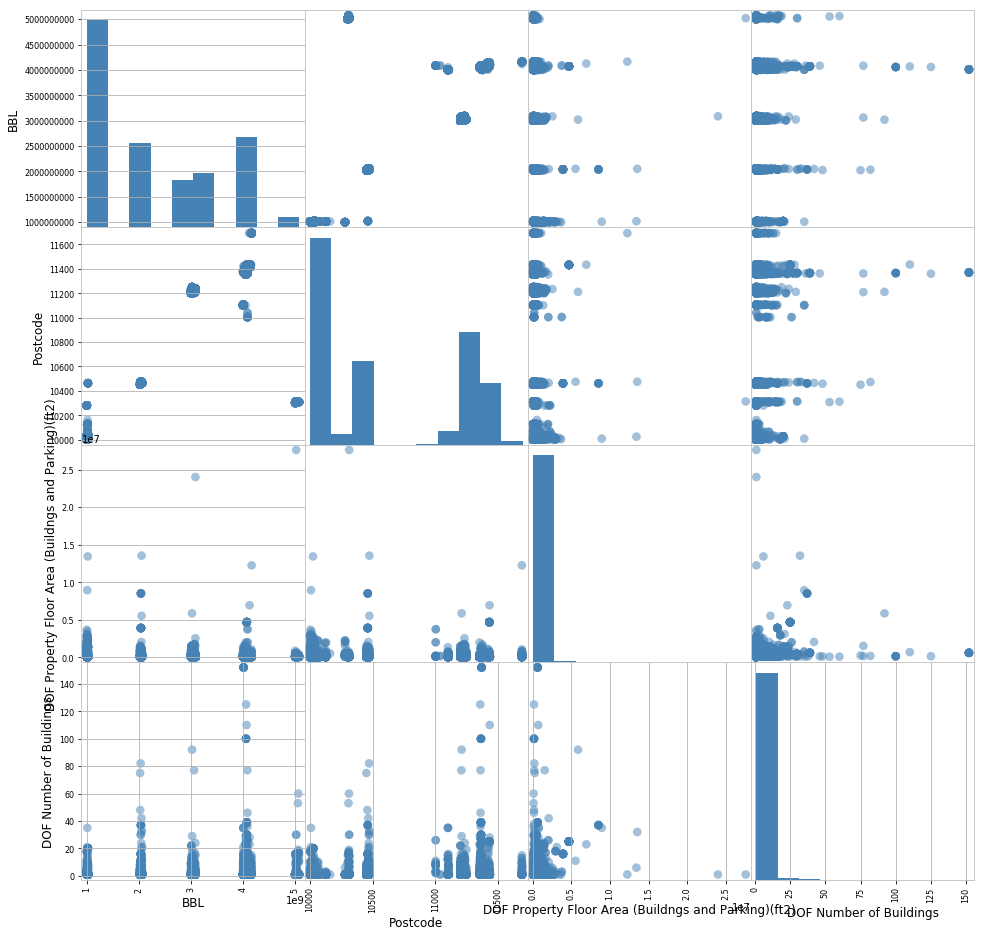

Figure 1. Matrix of different variables from energy consumption dataset. Not all columns are successfully plotted.


In [9]:
scatter_matrix (nrg, s=300, figsize=(16, 16))
pl.show()
print ("Figure 1. Matrix of different variables from energy consumption dataset. " + 
       "Not all columns are successfully plotted.")

In [10]:
#I learnt part of this def from Zhiao, it's very useful.
#And I added the convert test into this def.
def to_numeric(df):
    """
    This is used to set invalid parsing as NaN, and then try to check I successfully covert all data in a dataframe.
    Input: dataframe
    output: return converted dataframe if succeed, showing how many invalid entries changed to NaN, otherwise print "Unable to fully convert"
    """
    print ("Invalid entries changed to NaN")
    for i in range(len(df.columns)):
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i],errors='coerce')
        try:
            df[df.columns[i]].astype(float)
            indx = np.isnan(df[df.columns[i]]).sum()
            print ("{}: {}".format(df.columns[i], indx))
        except:
            print ("Unable to fully convert")
            break
    return df

In [11]:
to_numeric(nrg)
to_numeric(bsize);

Invalid entries changed to NaN
BBL: 156
Postcode: 1738
Site EUI(kBtu/ft2): 4623
Reported Property Floor Area (Building(s)) (ft²): 3125
DOF Property Floor Area (Buildngs and Parking)(ft2): 1705
DOF Number of Buildings: 1705
Invalid entries changed to NaN
BBL: 0
UnitsRes: 0
UnitsTotal: 0
YearBuilt: 0


In [12]:
#take a look at the data I want to merge on
(bsize.BBL.values[0]), (nrg.BBL.values[0])

(1000010201.0, 1000410001.0)

In [13]:
bblnrgdata = nrg.merge(bsize, left_on='BBL', right_on='BBL').dropna()
bblnrgdata.shape

(4684, 9)

In [14]:
bblnrgdata.columns

Index(['BBL', 'Postcode', 'Site EUI(kBtu/ft2)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'DOF Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt'],
      dtype='object')

In [15]:
#keep columns I need
result = bblnrgdata[['BBL', 'Site EUI(kBtu/ft2)', 'UnitsRes', 'UnitsTotal', 'YearBuilt']]

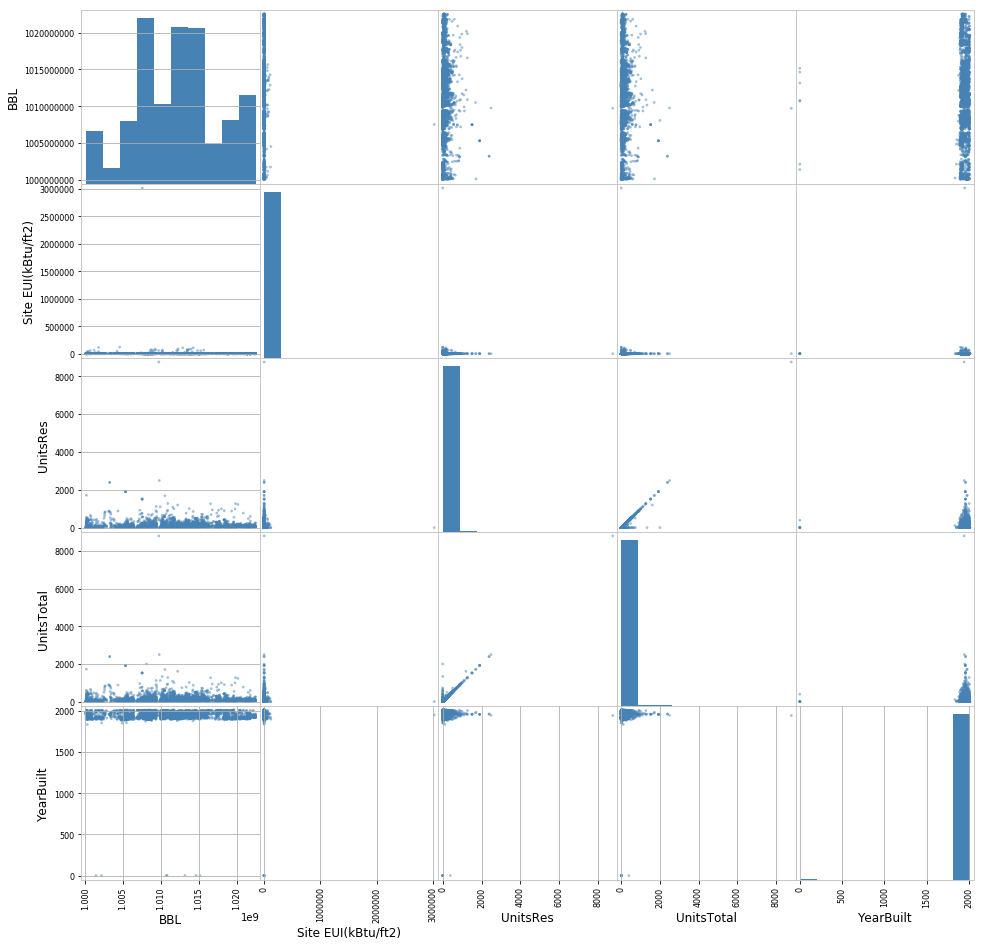

Figure 2. Matrix of different variables from energy consumption dataset and Pluto. Here we can spot some correlations. UnitsRes and UnitsTotalhave obvious relation, while others are scrunched against the axis.


In [16]:
scatter_matrix (result, s=30, figsize=(16, 16))
pl.show()
print ("Figure 2. Matrix of different variables from energy consumption dataset " + 
       "and Pluto. Here we can spot some correlations. UnitsRes and UnitsTotal" +
       "have obvious relation, while others are scrunched against the axis.")

In [17]:
bblnrgdata['Energy_Total'] = bblnrgdata['Site EUI(kBtu/ft2)'] * bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)']

In [18]:
bblnrgdata.columns

Index(['BBL', 'Postcode', 'Site EUI(kBtu/ft2)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'DOF Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
       'Energy_Total'],
      dtype='object')

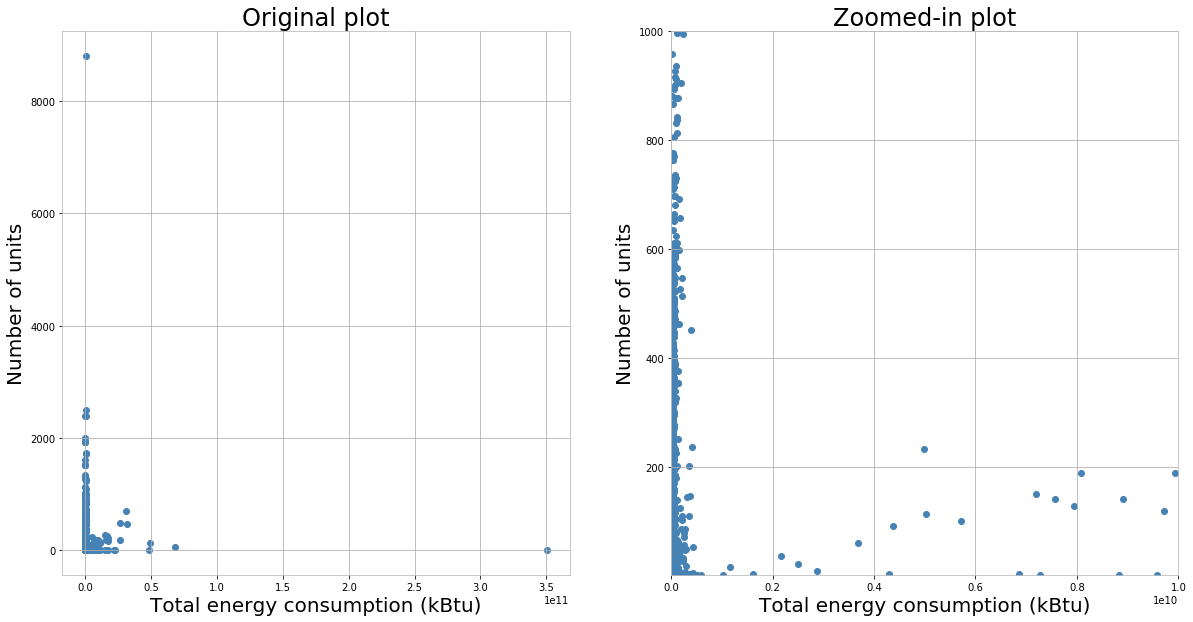

Figure 3. Energy vs Units. Original plot revealed little information as all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. The zoomed-in plot looks better, but still quite compact near the axis.


In [19]:
fig = pl.figure(figsize=(20,10))
fig.add_subplot(121)
pl.scatter(bblnrgdata['Energy_Total'], bblnrgdata['UnitsTotal'])
pl.xlabel('Total energy consumption (kBtu)', fontsize=20)
pl.ylabel('Number of units', fontsize=20)
pl.title('Original plot', fontsize = 24)

fig.add_subplot(122)
pl.scatter(bblnrgdata['Energy_Total'], bblnrgdata['UnitsTotal'])
pl.xlabel('Total energy consumption (kBtu)', fontsize=20)
pl.ylabel('Number of units', fontsize=20)
pl.title('Zoomed-in plot', fontsize = 24)
pl.xlim(1000,1e10)
pl.ylim(1,1000)

pl.show()
print ("Figure 3. Energy vs Units. Original plot revealed little information as " +
       "all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. " + 
       "The zoomed-in plot looks better, but still quite compact near the axis.")

In [20]:
bblnrgdata['Reported Property Floor Area (Building(s))'] = bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)']

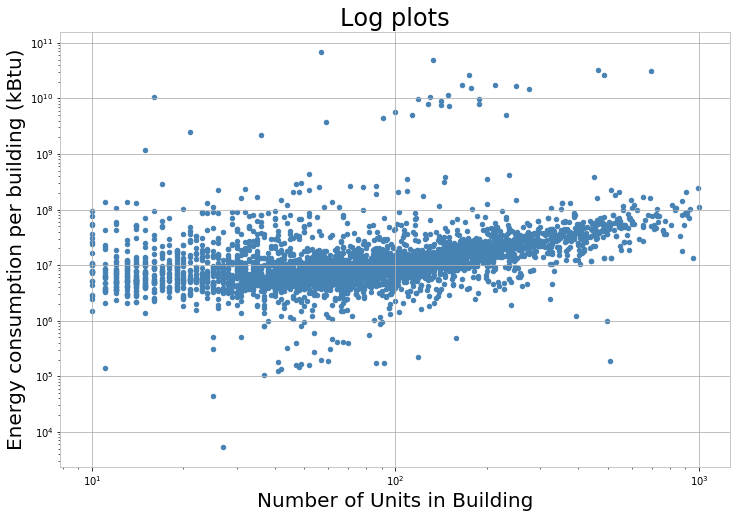

Figure 4. Energy consumption per building vs number of units in building. some correlation might exist between these two log-transformed variables.


In [21]:
#cut extreme values so I can do my analysis
bblnrgdataCut = bblnrgdata[(bblnrgdata['Energy_Total'] > 1000) & (bblnrgdata.UnitsTotal>=10) & 
                           (bblnrgdata.UnitsTotal<1000)]
bblnrgdataCut = bblnrgdataCut.copy(deep=True)

ax = bblnrgdataCut.plot(kind='scatter', y='Energy_Total', x='UnitsTotal', 
                        marker='o',  figsize=(12, 8), loglog=True)
ax.set_xlabel("Number of Units in Building", fontsize=20)
ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)
ax.set_title("Log plots", fontsize = 24)

pl.show()
print ("Figure 4. Energy consumption per building vs number of units in building. " +
       "some correlation might exist between these two log-transformed variables.")

# 3. Model fitting

## Set alpha = 0.05

#### 3.1 fit a line to Units vs Energy.

In [22]:
bblnrgdataCut['Energy_Total_log'] = np.log(bblnrgdataCut['Energy_Total'])
bblnrgdataCut['UnitsTotal_log'] = np.log(bblnrgdataCut['UnitsTotal'])
linmodel1 = smf.ols('Energy_Total_log ~ UnitsTotal_log', data=bblnrgdataCut).fit()
linmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Energy_Total_log   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     801.2
Date:                Sat, 21 Oct 2017   Prob (F-statistic):          8.76e-161
Time:                        11:36:16   Log-Likelihood:                -5650.4
No. Observations:                3990   AIC:                         1.130e+04
Df Residuals:                    3988   BIC:                         1.132e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.0618      0.077    182.067      0.000      13.910      14.213
UnitsTotal_log     0.4910      0.017     28.306      0.000       0.457       0.525
==============================================================================
Omnibus:                     2193.535   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48111.523
Skew:                           2.157   Prob(JB):                         0.00
Kurtosis:                      19.456   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of UnitsTotal_log and the intercept are small than 0.05. But the R-squared = 0.167, the whole model does not explain the data well.

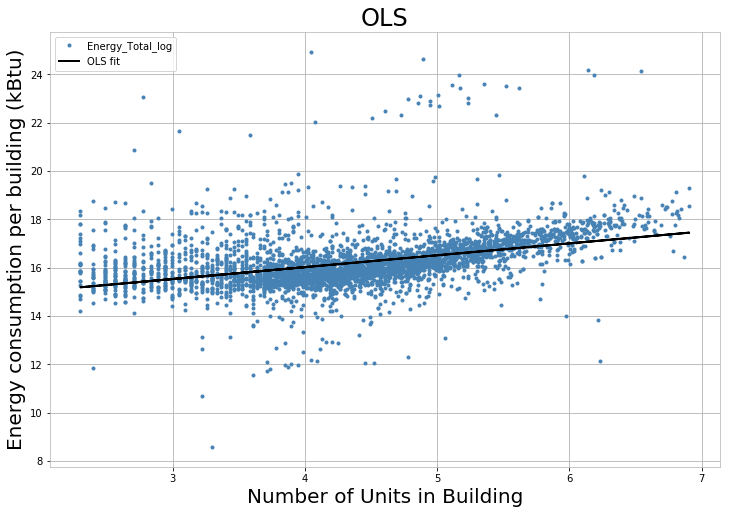

Figure 5. Energy consumption per building vs number of units in building. Fitting a OLS line in this data.


In [23]:
fig = pl.figure(figsize=(12, 8))
pl.plot(bblnrgdataCut['UnitsTotal_log'], bblnrgdataCut['Energy_Total_log'], '.');
pl.plot(bblnrgdataCut['UnitsTotal_log'], linmodel1.predict(), color='k', label='OLS fit');
pl.xlabel("Number of Units in Building", fontsize=20)
pl.ylabel("Energy consumption per building (kBtu)", fontsize=20)
pl.title('OLS', fontsize = 24)
pl.legend()
pl.show()
print ("Figure 5. Energy consumption per building vs number of units in building. " +
       "Fitting a OLS line in this data.")

#### 3.2 fit a line to Energy vs Units.

In [24]:
linmodel2 = smf.ols('UnitsTotal_log ~ Energy_Total_log', data=bblnrgdataCut).fit()
linmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UnitsTotal_log   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     801.2
Date:                Sat, 21 Oct 2017   Prob (F-statistic):          8.76e-161
Time:                        11:36:16   Log-Likelihood:                -4921.2
No. Observations:                3990   AIC:                             9846.
Df Residuals:                    3988   BIC:                             9859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.1619      0.195     -5.945      0.000      -1.545      -0.779
Energy_Total_log     0.3407      0.012     28.306      0.000       0.317       0.364
==============================================================================
Omnibus:                      154.336   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.373
Skew:                          -0.489   Prob(JB):                     3.71e-38
Kurtosis:                       3.283   Cond. No.                         242.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of UnitsTotal_log and the intercept are small than 0.05. But the R-squared = 0.167, the whole model does not explain the data well.

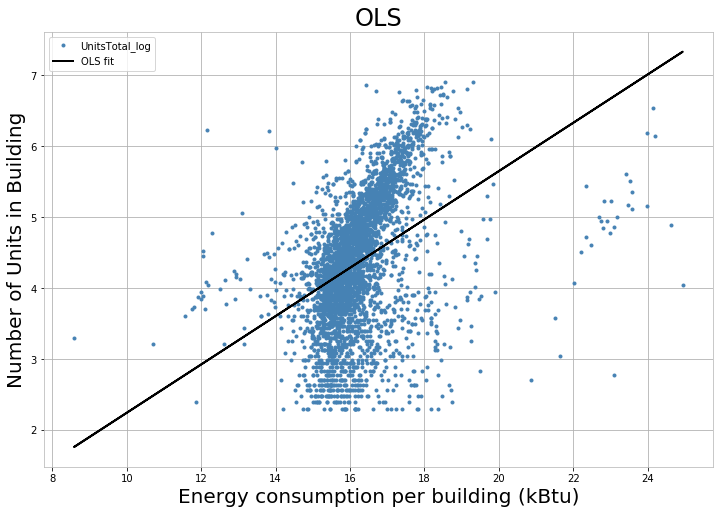

Figure 6. Number of units in building vs energy consumption per building.Fitting a OLS line in this data.


In [25]:
fig = pl.figure(figsize=(12, 8))
pl.plot(bblnrgdataCut['Energy_Total_log'], bblnrgdataCut['UnitsTotal_log'], '.')
pl.plot(bblnrgdataCut['Energy_Total_log'], linmodel2.predict(), color='k', label='OLS fit')
pl.xlabel("Energy consumption per building (kBtu)", fontsize=20)
pl.ylabel("Number of Units in Building", fontsize=20)
pl.title('OLS', fontsize = 24)
pl.legend()
pl.show()
print ("Figure 6. Number of units in building vs energy consumption per building." +
       "Fitting a OLS line in this data.")

#### 3.3 evaluate which is better by calculating the chi square.

In [26]:
#multiply two independent Poisson distributions, the errors are caculated as below
errorsnrg = np.sqrt((bblnrgdataCut['Reported Property Floor Area (Building(s))'])**2 +\
                (bblnrgdataCut['Site EUI(kBtu/ft2)']**2))
errorsunits = np.sqrt(bblnrgdataCut.UnitsTotal)

#we work in log space
errorsInLogNrg = np.abs(errorsnrg / bblnrgdataCut['Energy_Total'] / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdataCut['UnitsTotal'] / np.log(10))

bblnrgdataCut['errorsnrg'] = errorsInLogNrg
bblnrgdataCut['errorsunits'] = errorsInLogUnits

In [27]:
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [28]:
chi2_model1 = chi2(bblnrgdataCut['Energy_Total_log'], linmodel1.predict(), errors = bblnrgdataCut['errorsnrg'])
chi2_model1

18183702222231.496

In [29]:
chi2_model2 = chi2(bblnrgdataCut['UnitsTotal_log'], linmodel2.predict(), errors = bblnrgdataCut['errorsunits'])
chi2_model2

2355979.6231255657

We cannot do the likelihood ratio test here, as two models are not nested. The one with smaller chi square might be a better choice. Here the second model (Units vs Energy) is better based on the caculation result above.

#### 3.4 fit a 2nd degree polynomial

In [30]:
dfline = pd.DataFrame({'x': bblnrgdataCut['UnitsTotal_log'], 'y': bblnrgdataCut['Energy_Total_log'], 'x2': bblnrgdataCut['UnitsTotal_log']*bblnrgdataCut['UnitsTotal_log']})
dfline.head()

,x,x2,y
2,4.025352,16.203456,17.538357
16,3.178054,10.100026,17.567083
18,3.178054,10.100026,16.776852
19,4.127134,17.033238,16.004231
20,4.442651,19.737150,15.685000


In [31]:
fittedline = smf.ols(formula='y ~ x2 + x', data=dfline)
curvemodel = fittedline.fit()
curvemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     604.1
Date:                Sat, 21 Oct 2017   Prob (F-statistic):          6.59e-230
Time:                        11:36:17   Log-Likelihood:                -5487.5
No. Observations:                3990   AIC:                         1.098e+04
Df Residuals:                    3987   BIC:                         1.100e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.7302      0.264     70.913      0.000      18.212      19.248
x2             0.2531      0.014     18.415      0.000       0.226       0.280
x             -1.7315      0.122    -14.212      0.000      -1.970      -1.493
==============================================================================
Omnibus:                     2364.654   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65843.345
Skew:                           2.318   Prob(JB):                         0.00
Kurtosis:                      22.353   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

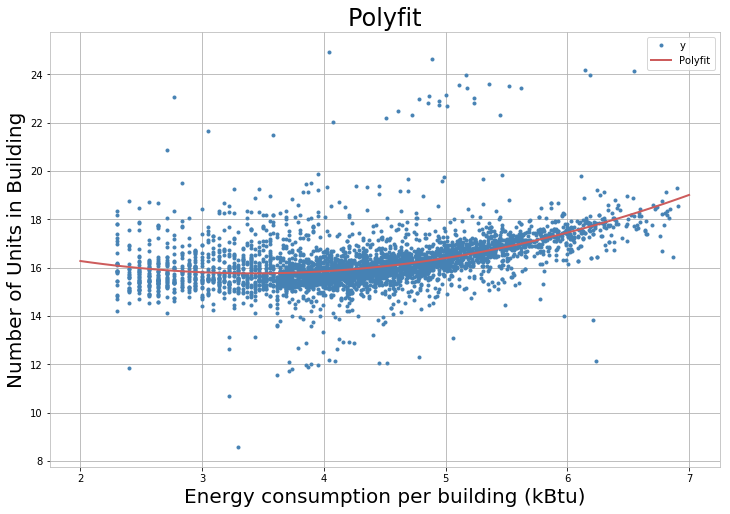

Figure 7. Number of units in building vs energy consumption per building. Fitting a 2nd degree polynomial in this data.


In [44]:
fig = pl.figure(figsize=(12, 8))
z = np.polyfit(dfline.x, dfline.y, 2)
p = np.poly1d(z)
xp = np.linspace(2, 7, 100)
pl.plot(dfline.x, dfline.y, '.') 
pl.plot(xp, p(xp), '-', label = 'Polyfit')
pl.xlabel("Energy consumption per building (kBtu)", fontsize=20)
pl.ylabel("Number of Units in Building", fontsize=20)
pl.title('Polyfit', fontsize = 24)
pl.legend()
pl.show()
print ("Figure 7. Number of units in building vs energy consumption per building. " +
       "Fitting a 2nd degree polynomial in this data.")

#### 3.5 Likelihood ratio test

Null hypothsis: the polynomial model is not better than the linear one.

In [33]:
print ("LR : ", -2 * (linmodel1.llf - curvemodel.llf))
print ("LR from statsmodels:", ...)

LR :  325.711824214
LR from statsmodels: Ellipsis


In [34]:
curvemodel.compare_lr_test(linmodel1)

(325.7118242136894, 8.2561207851781648e-73, 1.0)

#### The critical chi squared value for 1 degree of freedom is 3.84 < 325.71, so we can reject the Null hypothsis. We think the polynominal model is a better choice here.

# 4. Extra credit

In [35]:
def resi_squa(a,b,errors):
    return (np.log(bblnrgdataCut['Energy_Total']) - np.log(bblnrgdataCut['UnitsTotal'])*a+b )**2 / errors**2

In [36]:
errors = np.sqrt(np.log(bblnrgdataCut['Energy_Total']))
B = np.arange(-100, 100, 1)
A = np.arange(-50.0, 50.0, 0.5) 
Lsurface = np.zeros((len(A), len(B)))

In [37]:
for i,a in enumerate(A):
    for j,b in enumerate(B):
        Lsurface[i][j] = np.nansum(resi_squa(a,b,errors))

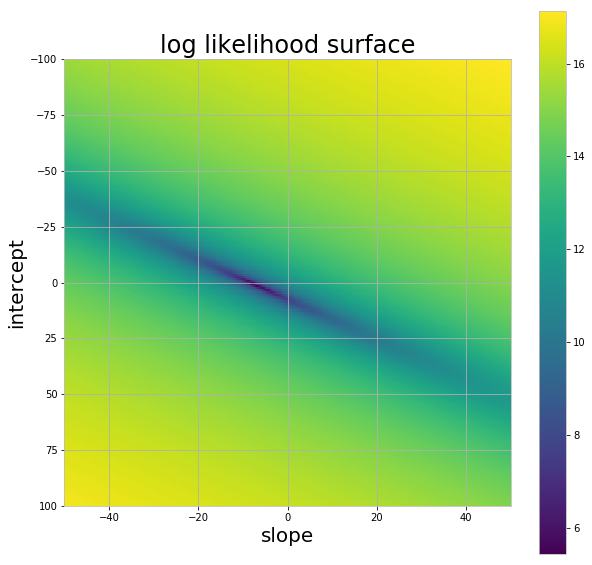

In [38]:
pl.figure(figsize = (10, 10))
pl.title("log likelihood surface", fontsize = 24)
pl.imshow(np.log(Lsurface), extent = [-50, 50, 100, -100], aspect = 0.5)
pl.xlabel('slope', fontsize = 20)
pl.ylabel('intercept', fontsize = 20)
pl.colorbar()
pl.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,0,'total energy consumption (kBtu)')

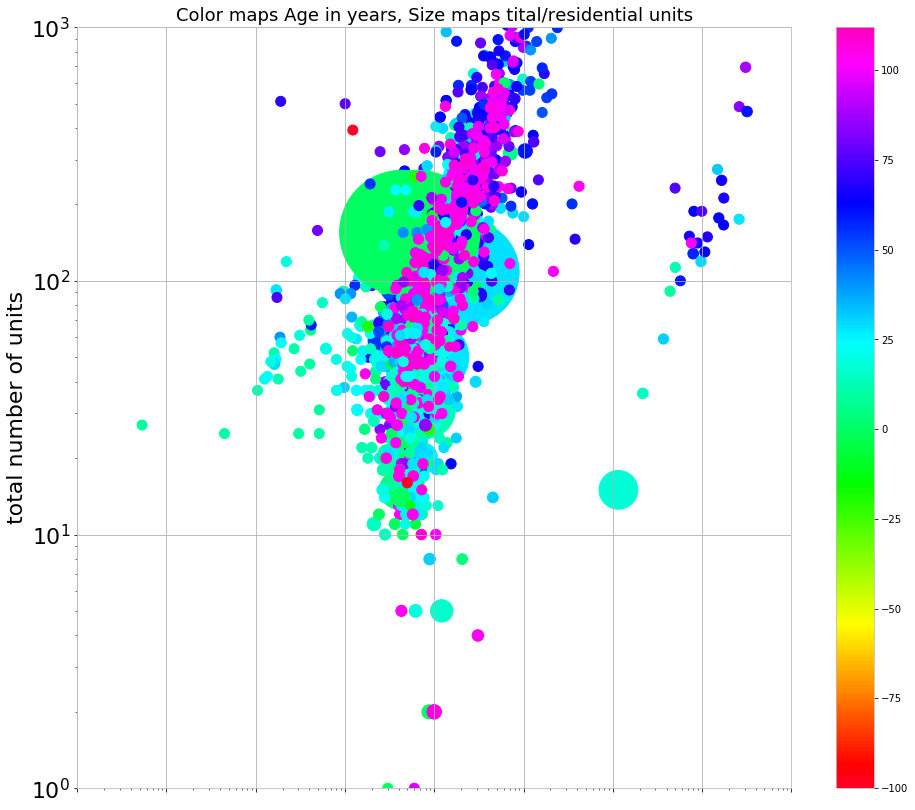

In [39]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='Energy_Total',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)